<a href="https://colab.research.google.com/github/sp-au-mu-nl/MediaDataProgramming/blob/main/intro_numpy/answer/intro_numpy_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# プロジェクト・オーディオ周波数

C和音の音声データは Cchord.pkl というファイルに保存されています。このファイルには、次の 2 つの変数が含まれています。


1.   y: 録音された信号
2.   fs: サンプリング周波数

このタスクでは、関数 size を使用して、配列内の要素数を返します。

ファイル Cchord.pkl を読み込みます。

y の要素数を n という名前の変数として 0 から n-1 までの、間隔 1 の等間隔ベクトル t を作成しましょう。

In [1]:
import dill
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
!wget https://github.com/sp-au-mu-nl/MediaDataProgramming/raw/refs/heads/main/intro_numpy/data/Cchord.pkl

--2025-08-26 13:15:46--  https://github.com/sp-au-mu-nl/MediaDataProgramming/raw/refs/heads/main/intro_numpy/data/Cchord.pkl
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sp-au-mu-nl/MediaDataProgramming/refs/heads/main/intro_numpy/data/Cchord.pkl [following]
--2025-08-26 13:15:47--  https://raw.githubusercontent.com/sp-au-mu-nl/MediaDataProgramming/refs/heads/main/intro_numpy/data/Cchord.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49997 (49K) [application/octet-stream]
Saving to: ‘Cchord.pkl’

Cchord.pkl          100%[===================>]  48.83K  --.-KB/s    in 0.005s  

2025-08-26 

In [4]:
dill.load_session('Cchord.pkl')
n = np.size(y)
t = np.arange(n)

これで t の点の数は正しくなりましたが、t はオーディオ信号がサンプリングされた時間を表す必要があります。サンプリング周波数 fs を使用すると、ベクトルを時間 (秒単位) に変換できます。

t を fs で除算します。出力を同じ変数 t に代入します。次に、t に対して y をプロットします。

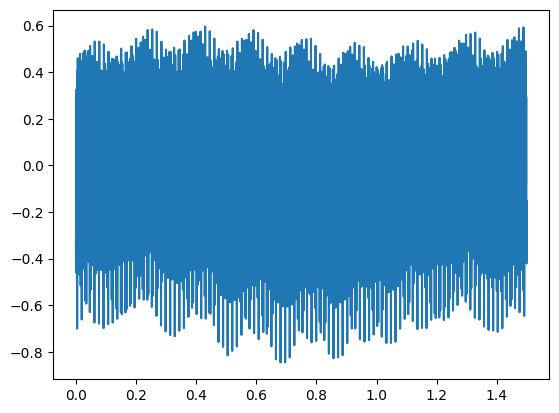

In [5]:
t = t / fs
plt.plot(t, y)

プロット内で、y は周期的であるものの、単純な正弦波ではないことに注目してください。これは周波数の異なる複数の正弦波で構成されています。

フーリエ変換は、信号の周波数成分に関する情報を返します。優位周波数の場所が、和音に含まれている音を示します。

関数 fft を使用すると、ベクトルの離散フーリエ変換を計算できます。
```
np.fft.fft(y)
```
fft からの出力値は複素数です。関数 abs を使用すると振幅が得られます。

In [6]:
yfft = np.abs(np.fft.fft(y))

上記では信号 y の時間ベクトル t を計算しました。同様に、FFT ベクトル yfft の周波数ベクトル f を計算する必要があります。

0 から n-1 まで、間隔 1 の等間隔ベクトル f を作成します。

In [7]:
f = np.arange(n)

この時点で、ベクトル f には n 個の点が含まれています。これらの点を周波数に変換するには、ベクトル全体をサンプリング周波数 (fs) で乗算し、点の数 (n) で除算します。

f には 0 から fs までの周波数が含まれるようになります。

f を fs/n で乗算します。出力を同じ変数 f に代入します。

ここでは、プロットしたグラフに対して、インタラクティブに操作できるプロットを行います。

それには、plotly というライブラリを使うのが便利です。
```
import plotly.express as px
px.plot(x=t, y=y)
```
x 軸の範囲を 0 から 1000 にし、f に対して yfft をプロットします。

優位周波数は f の先頭に配置されています。fig.update_layout メソッドを使用し、xaxis_range パラメタで範囲を指定すると、対象領域にズーム インできます。
```
fig = px.line(x=t, y=y)
fig.update_layout(xaxis_range=[xmin, xmax])
```

In [8]:
f = f * fs/n
fig = px.line(x=f, y=yfft)
fig.update_layout(xaxis_range=[0, 1000])

グラフ上でカーソルを使用して周波数の場所を確認します。

最初の 3 つのスパイクは、ミドル C 和音を構成する音です。

他の 3 つのスパイクは何でしょうか? 和音が演奏されるとき、信号には "基本周波数" と、関連する "高調波" が含まれます。この場合、高調波はオクターブの異なる同じ和音です。

以下の表の周波数を使用すると、プロット内の 6 つのスパイクが、ミドル C 和音の基本周波数および最初の高調波に対応することを確認できます。

|音|周波数|
|----|----|
|$C_4$|261.6|
|$E_4$|329.6|
|$G_4$|392.0|
|$C_5$|525.3|
|$E_5$|659.3|
|$G_5$|784.0|


